In [1]:
%matplotlib inline

In [2]:
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt

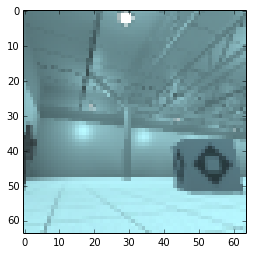

In [3]:
img = scipy.misc.imread('../../TrainingData/capture000001.png')[:,:,:-1]

normalized = np.mean(img, axis=2) / 255.0

# print normalized

plt.imshow(img, interpolation='nearest')


In [5]:
n_extract = 3
labels = open('../../TrainingData/LabeledData-2015-09-06/labels.dat')
lines = labels.readlines()[:n_extract]

data = np.asarray([[float(d) for d in l.split(',')[:-1]] for l in lines])
data = data.reshape(n_extract, 4, 5)
print data

[[[ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.64        1.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.1126599   0.1388946   0.1604703   0.1721683   0.1734007 ]]

 [[ 1.          0.68        0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.24        0.12        0.        ]
  [ 0.05718367  0.0645941   0.06920768  0.07800716  0.1633384 ]]

 [[ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.3999999   0.          0.          0.        ]
  [ 0.3483396   0.3526618   0.336974    0.2999521   0.250521  ]]]


In [6]:
def load_training_img(index):
    return scipy.misc.imread('../../TrainingData/LabeledData-2015-09-06/capture' + str(index).zfill(6) + '.png')[:,:,:-1]

In [28]:
def load_labeling_data(lower, upper):    
    labels = open('../../TrainingData/LabeledData-2015-09-06/labels.dat')
    lines = labels.readlines()[lower:upper]

    data = np.asarray([[float(d) for d in l.split(',')[:-1]] for l in lines])
    return data.reshape(upper-lower, 4, 5)

In [62]:
def filter_color(img, color):
    return np.repeat(img[:, :, color:color+1], 3, axis=2)

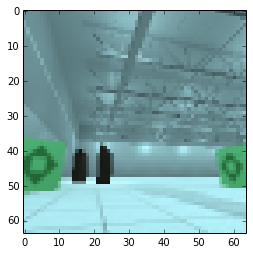

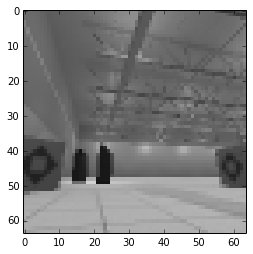

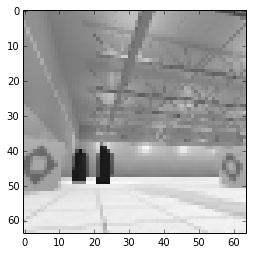

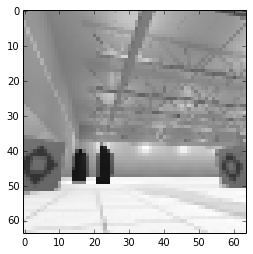

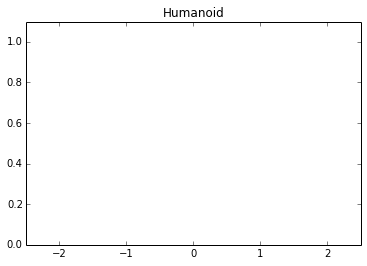

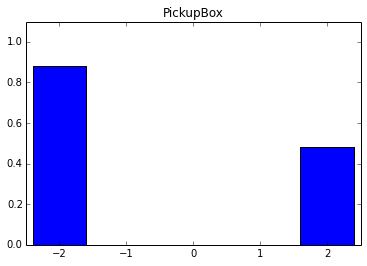

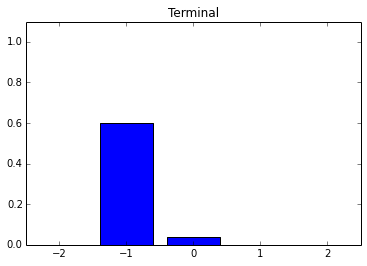

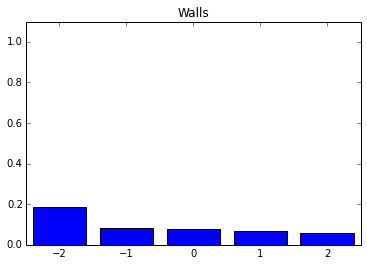

In [67]:
pic_ind = 30012

img = load_training_img(pic_ind)

plt.imshow(img, interpolation='nearest')
plt.show()
plt.imshow(filter_color(img, 0), interpolation='nearest')
plt.show()


data = load_labeling_data(pic_ind, pic_ind+1)
label_titles = ['Humanoid', 'PickupBox', 'Terminal', 'Walls']

for d, t in zip(data[0], label_titles):
    ax = plt.subplot()    
    ax.set_ylim(0, 1.1)
    ax.set_xlim(-2.5, 2.5)
    ax.set_title(t)
    barchart = ax.bar(np.arange(5) - 2, d, align='center')
    plt.show()